In [3]:
# import thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from pandas.testing import assert_frame_equal
import pandas._testing as tm;
%matplotlib inline

In [4]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [5]:
df = pd.read_csv("Diet_R.csv", skipinitialspace = True)
df.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
5,4,0.0,33,171,64,1,61.1
6,5,0.0,50,170,65,1,62.2
7,6,0.0,50,201,66,1,64.0
8,7,0.0,37,174,67,1,65.0
9,8,0.0,28,176,69,1,60.5


In [6]:
#người 25, 26 thiếu dữ liệu nên ta sẽ xóa chúng đi
df.dropna(subset = ["gender"], inplace=True)
df.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
5,4,0.0,33,171,64,1,61.1
6,5,0.0,50,170,65,1,62.2
7,6,0.0,50,201,66,1,64.0
8,7,0.0,37,174,67,1,65.0
9,8,0.0,28,176,69,1,60.5
10,9,0.0,28,165,70,1,68.1
11,10,0.0,45,165,70,1,66.9


**Phát biểu giả thuyết**

$H0:$ Cân nặng trung bình của trước và sau khi giảm cân là bằng nhau

$H1:$ Cân nặng trung bình của trước và sau khi giảm cân là khác nhau

Text(0.5, 1.0, 'Cân nặng trước và sau khi giảm cân')

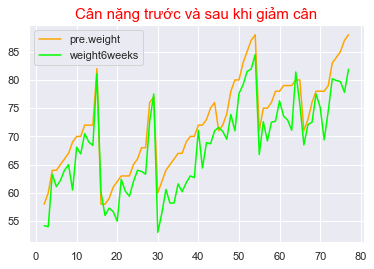

In [7]:
sns.set()
df[['pre.weight', 'weight6weeks']].plot(color = ['orange', 'lime'])
plt.title('Cân nặng trước và sau khi giảm cân', fontsize = 15, color = 'red')

In [8]:
stat, p_value = stats.ttest_rel(df["pre.weight"], df["weight6weeks"])
print('p_value =', p_value)
if p_value < 0.05:
    print('''Có đủ bằng chứng thống kê để bác bỏ giả thuyết H0. 
    Điều này ngụ ý ta chấp nhận giả thuyết H1''')
else:
    print('''Chưa có đủ bằng chứng thống kê để bác bỏ giả thuyết H0. 
    Điều này ngụ ý ta chấp nhận giả thuyết H0 ''')

p_value = 3.7220652146643845e-22
Có đủ bằng chứng thống kê để bác bỏ giả thuyết H0. 
    Điều này ngụ ý ta chấp nhận giả thuyết H1


In [9]:
#Tính chỉ số cân năng đã giảm
#Thêm cột cân nặng đã giảm
df['weightlost'] = df["pre.weight"] - df["weight6weeks"] 
df.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
2,1,0.0,22,159,58,1,54.2,3.8
3,2,0.0,46,192,60,1,54.0,6.0
4,3,0.0,55,170,64,1,63.3,0.7
5,4,0.0,33,171,64,1,61.1,2.9
6,5,0.0,50,170,65,1,62.2,2.8
7,6,0.0,50,201,66,1,64.0,2.0
8,7,0.0,37,174,67,1,65.0,2.0
9,8,0.0,28,176,69,1,60.5,8.5
10,9,0.0,28,165,70,1,68.1,1.9
11,10,0.0,45,165,70,1,66.9,3.1


**One-way ANOVA**

**a) weightlost ~ Diet**

**Phát biểu giả thuyết**

$H0:$ Không có sự khác biệt về hiệu quả giảm cân giữa các phương pháp giảm cân

$Ha:$ Có sự khác biệt về hiệu quả giảm cân giữa các phương pháp giảm cân

In [10]:
df_diet_lost = df[['Diet','weightlost']].copy()

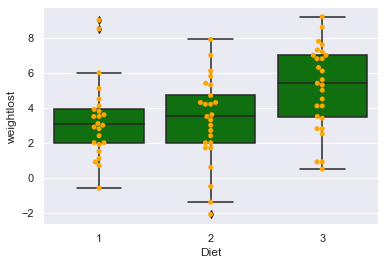

In [11]:
sns.boxplot(x='Diet',y='weightlost',data = df_diet_lost, color='green')
sns.swarmplot(x='Diet',y='weightlost', data = df_diet_lost, color='orange')
plt.show()

In [12]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [19]:
model = ols('weightlost ~ C(Diet)', data=df_diet_lost).fit()
anova_table = sm.stats.anova_lm(model, typ=2)   
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),60.527008,2.0,5.383104,0.006596
Residual,410.401807,73.0,NaN,NaN


In [65]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,5.383104,0.006596,Chấp nhận H1 với mức ý nghĩa 0.05


In [66]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [67]:
tukey = pairwise_tukeyhsd(endog = df_diet_losing['weightlost'],
                          groups = df_diet_losing['Diet'],
                          alpha = 0.05)

In [68]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.032,0.9,-1.6531,1.5891,False
1,3,1.8481,0.0188,0.2567,3.4396,True
2,3,1.8801,0.0152,0.3057,3.4546,True


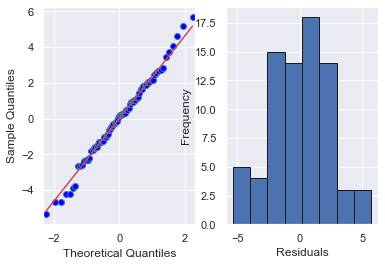

In [69]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**Phát biểu giả thiết thống kê:**

$H0:$ Mẫu tuân theo phân phối chuẩn


$H1:$ Mẫu khống tuân theo phân phối chuẩn

In [107]:
p_value = stats.shapiro(model.resid)[1]
print('p_value =', p_value)

p_value = 0.9087606072425842


In [102]:
if p_value > 0.05:
    print('Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý ta chấp nhận giả thuyết H0')
else:
    print('Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý ta chấp nhận giả thuyết H1')

Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý ta chấp nhận giả thuyết H0


**a) weightlost ~ gender**

**Phát biểu giả thuyết**

$H0:$ Không có sự khác biệt về hiệu quả giảm cân đối với các giới tính khác nhau

$H1:$ Có sự khác biệt về hiệu quả giảm cân đối với các giới tính khác nhau

In [82]:
#gender = 0: nữ, gender = 1: nam

In [83]:
df_gen_lost = df[['gender','weightlost']].copy()

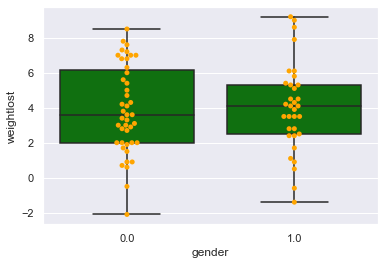

In [84]:
sns.boxplot(x='gender',y='weightlost',data = df_gen_lost, color='green')
sns.swarmplot(x='gender',y='weightlost', data = df_gen_lost, color='orange')
plt.show()

In [87]:
model_2 = ols('weightlost ~ C(gender)', data=df_gen_lost).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


In [88]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,0.043786,0.834827,Chấp nhận H0 với mức ý nghĩa 0.05


*Không cần tiến hành kiểm tra hậu nghiệm*

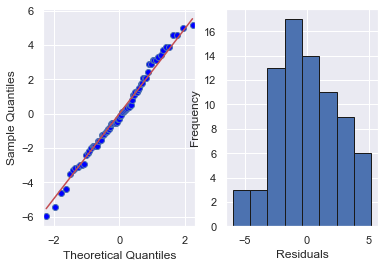

In [90]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model_2.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model_2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**Phát biểu giả thiết thống kê:**

$H0:$ Mẫu tuân theo phân phối chuẩn


$H1:$ Mẫu khống tuân theo phân phối chuẩn

In [108]:
p_value = stats.shapiro(model_2.resid)[1]
print('p_value =', p_value)

p_value = 0.702639102935791


In [101]:
if p_value > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý ta chấp nhận giả thuyết H0')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý ta chấp nhận giả thuyết H1')

Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý ta chấp nhận giả thuyết H0
